In [20]:
import os
import pickle

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers

In [46]:
PICKLE_DIR = "urbansounds_pickles" 
EPOCH_NUM = 100

In [4]:
X_train = pickle.load(open(os.path.join(PICKLE_DIR,"X_train.pickle"), "rb"))
y_train = pickle.load(open(os.path.join(PICKLE_DIR,"y_train.pickle"), "rb"))

X_val = pickle.load(open(os.path.join(PICKLE_DIR,"X_val.pickle"), "rb"))
y_val = pickle.load(open(os.path.join(PICKLE_DIR,"y_val.pickle"), "rb"))

X_test = pickle.load(open(os.path.join(PICKLE_DIR,"X_test.pickle"), "rb"))
y_test = pickle.load(open(os.path.join(PICKLE_DIR,"y_test.pickle"), "rb"))

In [5]:
X_train[0].shape

(128, 96, 1)

In [6]:
# IMG_SIZE = 256
NUM_CLASSES = 10
INPUT_SHAPE = X_train[0].shape

In [7]:
len(X_train),len(y_train),"-",len(X_val),len(y_val),"-",len(X_test), len(y_test)

(6000, 6000, '-', 1366, 1366, '-', 1366, 1366)

In [50]:
# Model
model = models.Sequential()

# Input Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=INPUT_SHAPE))

# Feature Extraction
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten
model.add(layers.Flatten())

# Classification
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))

# Output Layer
model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 126, 94, 32)       320       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 63, 47, 32)        0         
_________________________________________________________________
dropout_81 (Dropout)         (None, 63, 47, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 61, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 30, 22, 64)        0         
_________________________________________________________________
dropout_82 (Dropout)         (None, 30, 22, 64)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 28, 20, 64)      

In [51]:
history = model.fit(X_train, y_train, epochs=EPOCH_NUM, validation_data=(X_val, y_val), verbose=1)

Train on 6000 samples, validate on 1366 samples
Epoch 1/100
6000/6000 [==============================] - 5s 811us/sample - loss: 1.7043 - accuracy: 0.3972 - val_loss: 1.2012 - val_accuracy: 0.6303
Epoch 2/100
6000/6000 [==============================] - 3s 486us/sample - loss: 1.1395 - accuracy: 0.6185 - val_loss: 0.9894 - val_accuracy: 0.6611
Epoch 3/100
6000/6000 [==============================] - 3s 487us/sample - loss: 0.9133 - accuracy: 0.6988 - val_loss: 0.8164 - val_accuracy: 0.7291
Epoch 4/100
6000/6000 [==============================] - 3s 489us/sample - loss: 0.7347 - accuracy: 0.7578 - val_loss: 0.7307 - val_accuracy: 0.7540
Epoch 5/100
6000/6000 [==============================] - 3s 495us/sample - loss: 0.6019 - accuracy: 0.8010 - val_loss: 0.6523 - val_accuracy: 0.7767
Epoch 6/100
6000/6000 [==============================] - 3s 498us/sample - loss: 0.5146 - accuracy: 0.8292 - val_loss: 0.6157 - val_accuracy: 0.7958
Epoch 7/100
6000/6000 [==============================] - 3

6000/6000 [==============================] - 3s 498us/sample - loss: 0.0394 - accuracy: 0.9887 - val_loss: 1.1242 - val_accuracy: 0.8243
Epoch 56/100
6000/6000 [==============================] - 3s 491us/sample - loss: 0.0411 - accuracy: 0.9870 - val_loss: 1.0207 - val_accuracy: 0.8346
Epoch 57/100
6000/6000 [==============================] - 3s 489us/sample - loss: 0.0220 - accuracy: 0.9928 - val_loss: 1.1525 - val_accuracy: 0.8353
Epoch 58/100
6000/6000 [==============================] - 3s 489us/sample - loss: 0.0433 - accuracy: 0.9857 - val_loss: 1.1105 - val_accuracy: 0.8302
Epoch 59/100
6000/6000 [==============================] - 3s 489us/sample - loss: 0.0331 - accuracy: 0.9870 - val_loss: 1.1674 - val_accuracy: 0.8375
Epoch 60/100
6000/6000 [==============================] - 3s 490us/sample - loss: 0.0412 - accuracy: 0.9860 - val_loss: 1.4113 - val_accuracy: 0.8199
Epoch 61/100
6000/6000 [==============================] - 3s 497us/sample - loss: 0.0567 - accuracy: 0.9817 - val

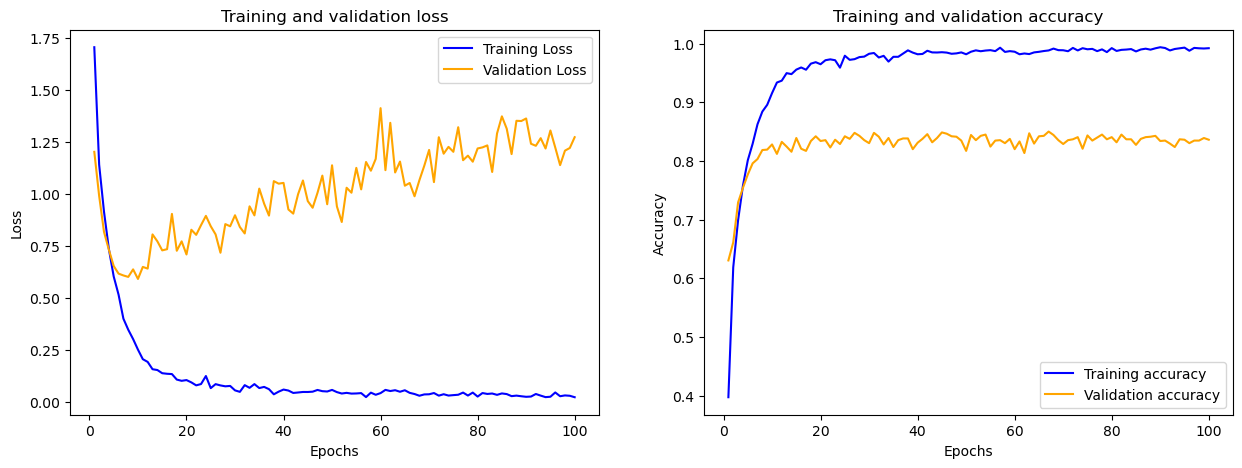

In [52]:
history_dict=history.history
loss_values=history_dict['loss']
acc_values=history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,EPOCH_NUM+1)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(epochs,loss_values,'blue',label='Training Loss')
ax1.plot(epochs,val_loss_values,'orange', label='Validation Loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax2.plot(epochs,acc_values,'blue', label='Training accuracy')
ax2.plot(epochs,val_acc_values,'orange',label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()

In [53]:
# model.save('UrbanSounds_model.h5')